# `FINAL PROJECT`

## **GAME ANALYSIS**

`Group ID`: 16

`Group Member`: 
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

## IMPORT

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### READ DATA

In [3]:
file_path = "Steam_2024_bestRevenue_1500.csv"
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='utf-8-sig')
    return data
data = read_data(file_path)

### HOW MANY ROWS AND HOW MANY COLUMNS?

In [4]:
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1500
Number of columns: 11


### THE MEANING OF EACH ROW

- Each row represents an individual game, and the columns provide details about the game's release, sales, price, revenue, average playtime, and ratings, along with information about the publisher and developer, steamID.

### DUPLICATED ROWS

In [5]:
def normalize_data(row):
    return row.apply(
        lambda x: str(sorted([str(v).strip().lower() for v in x])) if isinstance(x, list) 
        else str(x).strip().lower()
    )

normalized_df = data.apply(normalize_data, axis=1)

num_duplicated_rows = normalized_df.duplicated().sum()

if num_duplicated_rows > 0:
    duplicates = data_df[normalized_df.duplicated(keep=False)]
    print(f"The raw data has {num_duplicated_rows} duplicated rows.")
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated data found.")

No duplicated data found.


### THE MEANING OF EACH COLUMNS

- `name`: This column contains the name or title of the game.
- `releaseDate`: This column records the release date of the game. It is the date the game was officially made available to the public.
- `copiesSold`: This column represents the total number of copies of the game sold. This could refer to physical or digital copies.
- `price`: The price of the game when it was released.
- `revenue`: The total revenue generated from the sales of the game.
- `avgPlaytime`: This represents the average playtime of the game, often measured in hours.
- `reviewScore`: This column contains the average review score for the game.
- `publisherClass`: This indicates the classification of the publisher. It can be a general categorization such as "Indie," "AAA," or other types of publishers based on size, resources, and market reach.
- `publishers`: This column lists the name of the publisher of the game. Publishers are companies that manage the distribution and marketing of the game.
- `developers`: This column lists the names of the developers who created and worked on the game. 
- `steamId`: The unique identifier (ID) associated with the game on the Steam platform. 

### DATA TYPE OF EACH COLUMN

In [6]:
data.dtypes

name               object
releaseDate        object
copiesSold          int64
price             float64
revenue           float64
avgPlaytime       float64
reviewScore         int64
publisherClass     object
publishers         object
developers         object
steamId             int64
dtype: object

### ARE THESE COLUMNS HAVING INAPPROPRIATE DATA TYPES?

- Since all the columns's datatypes are `object`, we need to change into the appropriate datatypes: 
- `releaseDate`: This column should be `datetime`.
- `copiesSold`: This column should represent numeric data (`int` or `float`).
- `price`: This column should represent numeric data (`float`).
- `revenue`: This column should represent numeric data (`float`).
- `avgPlaytime`: This column should represent numeric data (`float`).
- `reviewScore`: This column should represent numeric data (`int` or `float`). 

In [7]:
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')  
data['copiesSold'] = pd.to_numeric(data['copiesSold'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data['avgPlaytime'] = pd.to_numeric(data['avgPlaytime'], errors='coerce')
data['reviewScore'] = pd.to_numeric(data['reviewScore'], errors='coerce')
data['steamId'] = data['steamId'].astype('object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23644\1376345834.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')


### NEW DATATYPES OF EACH COLUMNS

In [8]:
data.dtypes

name                      object
releaseDate       datetime64[ns]
copiesSold                 int64
price                    float64
revenue                  float64
avgPlaytime              float64
reviewScore                int64
publisherClass            object
publishers                object
developers                object
steamId                   object
dtype: object

## What percentage of the total revenue is generated by the top 5 publishers, and how does this reflect market concentration?

**Before answering this question, let's see what's the insights**
- Answer this question can understand the revenue concentration provides insights into industry dynamics and the competitiveness of smaller players.

**How to answer?**
- First, calculate the total revenue by summing up all the values in the `revenue` column. 
- Then, group the data by publisher and calculate the total revenue for each publisher, sorting them in descending order. 
- The top 5 publishers are selected, and their combined revenue is computed. 
- Finally, the percentage of the total revenue generated by these top 5 publishers is calculated and displayed, providing insights into how much of the total revenue comes from the leading publishers.

In [9]:
# Calculate the total revenue
total_revenue = data['revenue'].sum()
revenue_by_publisher = data.groupby('publishers')['revenue'].sum().sort_values(ascending=False)
top_5_revenue = revenue_by_publisher.head(5)

# Calculate the percentage of total revenue generated by the top 5 publishers
other_publishers= revenue_by_publisher.iloc[5:20]
top_5_total_revenue = top_5_revenue.sum()
percentage_revenue_top_5 = (top_5_total_revenue / total_revenue) * 100
print("Top 5 Publishers by Revenue:")
print(top_5_revenue)
print(f"\nPercentage of total revenue generated by the top 5 publishers: {percentage_revenue_top_5:.2f}%")

Top 5 Publishers by Revenue:
publishers
Game Science                  837793356.0
PlayStation Publishing LLC    508885199.0
Pocketpair                    392328553.0
Newnight                      217017892.0
CAPCOM Co., Ltd.              117881025.0
Name: revenue, dtype: float64

Percentage of total revenue generated by the top 5 publishers: 52.52%


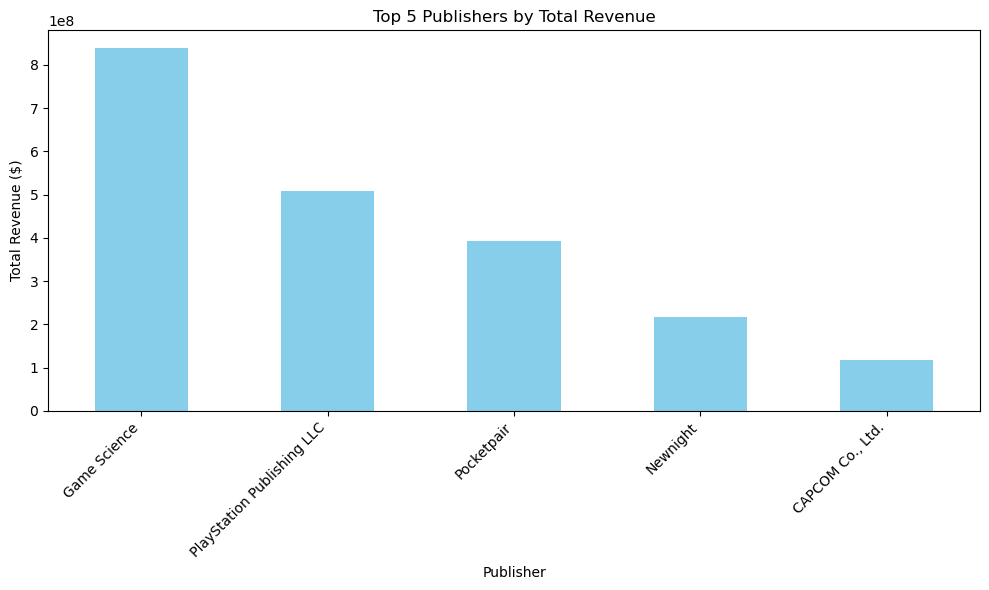

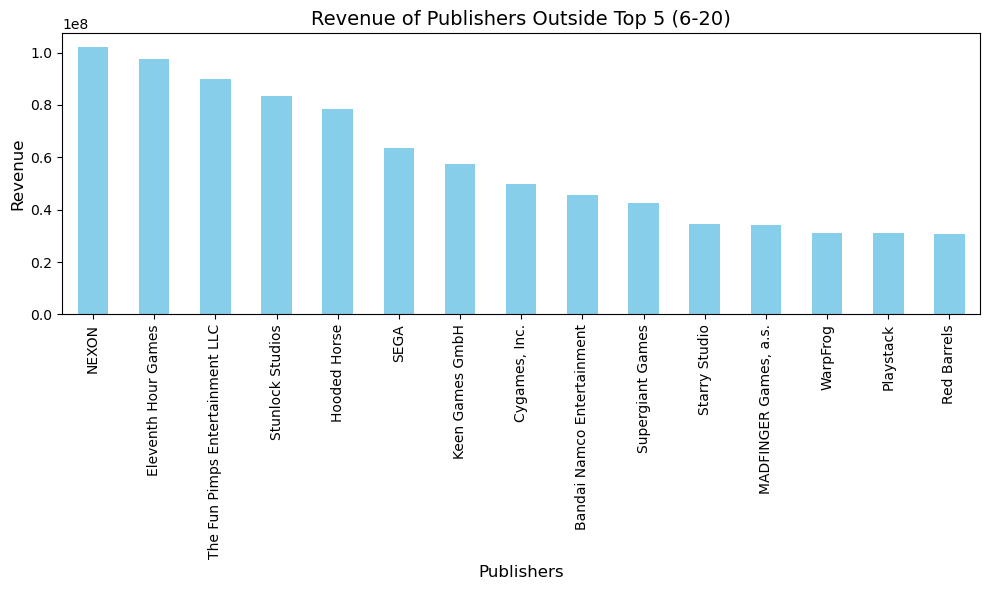

In [12]:
plt.figure(figsize=(10, 6))
top_5_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Publishers by Total Revenue')
plt.xlabel('Publisher')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Visualize the revenue of other publishers (6-12)
plt.figure(figsize=(10, 6))
other_publishers.plot(kind='bar', color='skyblue')
plt.title("Revenue of Publishers Outside Top 5 (6-20)", fontsize=14)
plt.xlabel("Publishers", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Conclusion
- **Game Science** stands out as the clear leader in total revenue, surpassing 800 million dollars. This significant gap suggests strong market performance, possibly due to successful game titles, strategic marketing, or expansion into global markets.
- **PlayStation Publishing LLC** and **Pocketpair** still maintain competitive positions with revenues of around 500 million and 400 million dollars, respectively. These publishers appear to be solid players, showing potential for future growth or maintaining steady market presence.
- **Newnight** and **CAPCOM Co., Ltd.** exhibit notably lower revenue figures compared to the top three publishers. This could indicate that they have smaller market shares or are still in the process of expanding their reach or diversifying their game portfolios.
- This bar chart highlights a clear hierarchy among the top five publishers, with Game Science leading by a substantial margin. While **PlayStation Publishing LLC** and **Pocketpair** are strong competitors, **Newnight** and **CAPCOM Co., Ltd.** lag behind significantly. The revenue distribution indicates a highly competitive market where the top publishers have a commanding presence. 
- This chart may serve as a snapshot of the industry's current state, showcasing both the success of leading companies and the challenges faced by others in maintaining or increasing their market share. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23644\1946365173.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  others = top_5_revenue.append(pd.Series({'Others': other_revenue}))


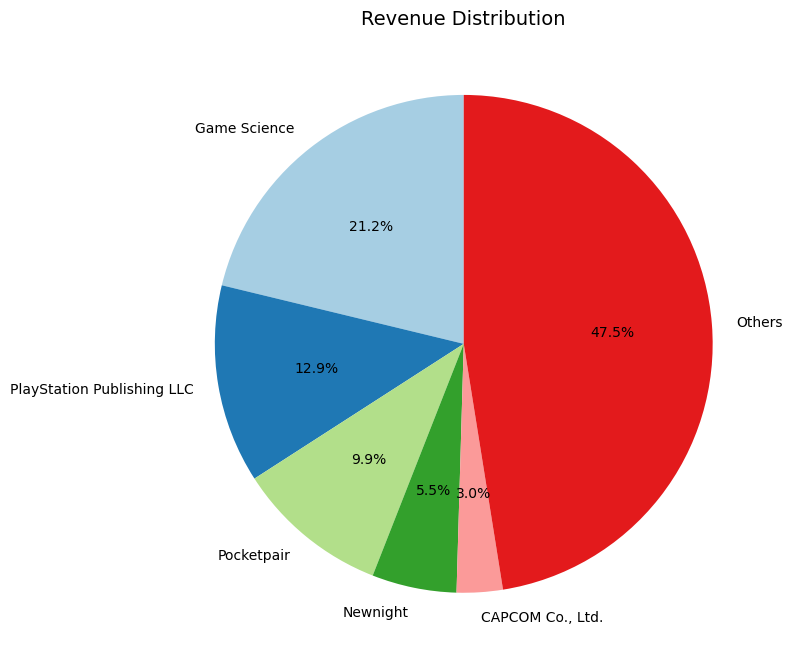

In [ ]:
other_revenue = revenue_by_publisher.iloc[5:].sum()

# Combine the top 5 revenue with the "Others" category
others = top_5_revenue.append(pd.Series({'Others': other_revenue}))

plt.figure(figsize=(8, 8))
others.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors, 
    labels=others.index
)
plt.title("Revenue Distribution", fontsize=14)
plt.ylabel("")  # Remove y-axis label for better presentation
plt.tight_layout()
plt.show()

#### Conclusion
- **Game Science** is a dominant player among the top 5, leading with 21.2% of total revenue, showing a significant individual market presence, but there is significant competition from other top publishers.
- The trend reflects a market with both key leaders and numerous smaller contributors that maintain overall industry balance.
- **Others publishers** contribute 47.5% of the total revenue. This indicates that while the top 5 publishers generate a significant share of revenue individually, a substantial portion of revenue still comes from smaller or less prominent publishers.

Difficulties:
- Struggling to comprehend the content of dataset, have trouble finding meaningful questions, determining datatypes of collumns.
- Uncertainty about the legality of using the dataset

Learned:
- Always verify the dataset's licensing and permissions, and be aware of relevant data protection laws before using it